Question 1

In [1]:
# 1
import cv2
import os
import numpy as np
import pandas as pd

array_of_img = []
file_names = []
gender_labels = []
def read_directory(directory_name):
    for filename_1 in range(1, 41):
        for filename_2 in range(1, 11): 
            img = cv2.imread(directory_name + "/" + str(filename_1) + '_' + str(filename_2) + ".png", 0)
            if filename_1 in [1, 8, 10, 32]:
                gender_labels.append(0)
            else:
                gender_labels.append(1)
            array_of_img.append(img)
    arr = np.array(array_of_img)
    arr = arr.reshape(400, 2576)
    data = pd.DataFrame(arr)
    data['gender'] = [g for g in gender_labels]
    return arr, gender_labels, data

arr, gender_labels, data = read_directory("D:/Anna/Anna/fourth2/analysis/HW2/ORL Faces")

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [3]:
data

,0,1,2,3,4,5,6,7,8,9,...,2567,2568,2569,2570,2571,2572,2573,2574,2575,gender
0,88,88,90,91,91,92,90,93,99,109,...,176,166,149,142,145,141,138,142,134,0
1,87,90,95,96,92,90,97,107,111,112,...,175,172,147,131,132,124,124,120,88,0
2,92,92,88,98,104,109,108,100,80,63,...,84,128,154,161,169,170,165,146,151,0
3,92,96,93,94,99,105,108,109,121,152,...,153,164,163,165,166,161,157,79,54,0
4,83,75,88,91,101,90,86,80,63,58,...,145,148,151,139,134,173,167,176,188,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,124,124,125,123,124,125,123,124,123,122,...,34,63,37,37,37,38,39,38,40,1
396,128,128,128,128,129,128,129,127,127,127,...,92,90,90,91,91,91,91,92,93,1
397,122,123,124,124,123,123,122,126,130,126,...,24,57,41,37,36,37,38,40,38,1
398,120,119,121,119,120,121,122,117,111,100,...,137,134,101,26,77,95,95,92,90,1


In [4]:
X_train, X_test, y_train, y_test = train_test_split(arr, gender_labels, test_size=0.2, random_state=42)

In [5]:
# Lasso Regression
lasso = LassoCV()
lasso.fit(X_train, y_train)
lasso_mse = np.mean((lasso.predict(X_test) - y_test) ** 2)
lasso_lambda = lasso.alpha_

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.175e-03, tolerance: 2.093e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.499e-03, tolerance: 2.175e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.292e-02, tolerance: 

In [6]:
# Ridge Regression
ridge = RidgeCV()
ridge.fit(X_train, y_train)
ridge_mse = np.mean((ridge.predict(X_test) - y_test) ** 2)
ridge_lambda = ridge.alpha_

In [7]:
print("Lasso regression MSE: ", lasso_mse)
print("Lasso regression lambda: ", lasso_lambda)
print("Ridge regression MSE: ", ridge_mse)
print("Ridge regression lambda: ", ridge_lambda)

Lasso regression MSE:  0.03718543677315922
Lasso regression lambda:  0.020340267238781535
Ridge regression MSE:  0.04028490693676074
Ridge regression lambda:  10.0


Lambda should be between 0 and 1. We choose to use the lasso regression.

In [8]:
print(lasso.score(X_train, y_train))

0.9966166480395108


In [9]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
model = LinearRegression()
model.fit(arr, gender_labels)
print(model.coef_)
features = []
for i in range(len(model.coef_)):
    if abs(model.coef_[i]) > 0.0002:
        features.append(i)
select = data[features]
select

[ 5.70808277e-05  8.36354862e-05  8.45232790e-05 ... -4.81145200e-05
 -2.09720399e-04 -1.79031701e-04]


,41,44,45,56,88,89,154,156,183,199,...,2346,2419,2438,2485,2511,2528,2539,2540,2546,2574
0,87,85,86,175,89,87,88,105,90,67,...,79,103,78,114,75,102,135,124,82,142
1,128,138,133,144,135,136,127,98,130,133,...,135,112,198,211,90,80,111,101,90,120
2,140,149,142,65,139,145,79,66,134,94,...,78,76,75,78,84,150,206,195,86,146
3,123,93,86,165,117,115,98,86,106,93,...,200,95,200,205,100,55,130,124,79,79
4,139,151,162,58,136,152,71,79,133,86,...,51,80,50,52,101,166,125,155,57,176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,119,118,119,130,120,120,92,87,118,99,...,94,174,91,91,105,37,102,137,64,38
396,124,124,123,138,124,124,73,73,124,81,...,73,123,71,70,137,91,105,94,55,92
397,121,121,119,125,120,121,100,91,119,111,...,91,177,88,88,120,40,121,130,81,40
398,126,126,126,77,125,126,169,139,124,128,...,64,84,63,62,132,92,63,28,48,92


In [10]:
import statsmodels.api as sm
select = select[[56, 493, 1062, 1323, 1730, 2116, 2485, 2540]]
model = sm.OLS(gender_labels, select).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.937
Model:                            OLS   Adj. R-squared (uncentered):              0.935
Method:                 Least Squares   F-statistic:                              725.2
Date:                Mon, 03 Apr 2023   Prob (F-statistic):                   1.24e-229
Time:                        04:50:16   Log-Likelihood:                          5.4887
No. Observations:                 400   AIC:                                      5.023
Df Residuals:                     392   BIC:                                      36.95
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

lasso and ridge regressions have a better score than the results with that of your 
stepwise regression in HW02. Because stepwise uses little features.

In [11]:
# b. 
chosen_pixels = np.where(lasso.coef_ != 0)[0]

In [12]:
chosen_pixels

array([   8,   10,   11,   19,   31,   33,   34,   43,   44,   53,   56,
         65,   89,  103,  114,  125,  150,  169,  179,  184,  200,  202,
        204,  211,  215,  216,  217,  218,  239,  279,  284,  295,  296,
        324,  342,  349,  370,  380,  439,  444,  459,  464,  475,  486,
        490,  509,  514,  515,  532,  534,  540,  549,  552,  584,  600,
        643,  645,  647,  648,  666,  693,  695,  696,  714,  724,  813,
        819,  821,  829,  830,  868,  873,  875,  895,  896,  915,  919,
        923,  935,  939,  942,  949,  962,  972,  975,  976,  995, 1003,
       1004, 1016, 1017, 1024, 1027, 1029, 1040, 1041, 1046, 1047, 1050,
       1053, 1062, 1069, 1072, 1093, 1094, 1122, 1127, 1128, 1135, 1142,
       1147, 1150, 1151, 1159, 1167, 1175, 1176, 1177, 1180, 1190, 1200,
       1210, 1230, 1236, 1244, 1258, 1262, 1274, 1279, 1285, 1291, 1294,
       1295, 1298, 1302, 1304, 1314, 1317, 1318, 1321, 1323, 1334, 1344,
       1361, 1367, 1369, 1379, 1380, 1386, 1387, 14

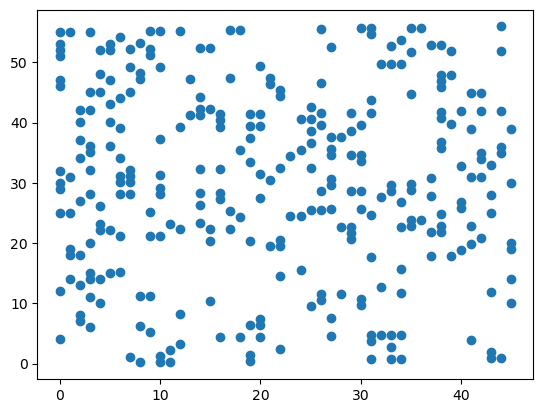

In [13]:
x = []
y = []
for i in chosen_pixels:
    x.append(i%46)
    y.append(i/46)
plt.scatter(x, y)

Question 2

In [14]:
df_2 = pd.read_csv("D:/Anna/Anna/fourth2/analysis/HW5/economics of transportation equipment.csv")
df_2

,year,capital,labor,value_added
0,72,1209188,1259142,11150.0
1,73,1330372,1371795,12853.6
2,74,1157371,1263084,10450.8
3,75,1070860,1118226,9318.3
4,76,1233475,1274345,12097.7
5,77,1355769,1369877,12844.8
6,78,1351667,1451595,13309.9
7,79,1326248,1328683,13402.3
8,80,1089545,1077207,8571.0
9,81,1111942,1056231,8739.7


In [15]:
V = np.log(df_2['value_added'])
K = np.log(df_2['capital'])
L = np.log(df_2['labor'])

In [16]:
X = sm.add_constant(np.column_stack((K, L)))
model = sm.OLS(V, X)
results = model.fit()

print('alpha: ', np.exp(results.params[0]))
print('beta1: ', results.params[1])
print('beta2: ', results.params[2])

alpha:  6.59948470234497e-05
beta1:  0.5056509223985586
beta2:  0.8454644447654598


In [17]:
# b.
Y = np.log(df_2["value_added"] / df_2['labor'])
Z = np.column_stack((K, np.ones(len(K))))
model2 = sm.OLS(Y, Z)
results2 = model2.fit()

beta1 = np.exp(results2.params[0])
beta2 = 1 - beta1
print('beta1 + beta2 = 1:')
print('beta1: ', beta1)
print('beta2: ', beta2)

beta1 + beta2 = 1:
beta1:  1.3989242069950247
beta2:  -0.39892420699502473


Question 3

In [16]:
mpg = open("D:/Anna/Anna/fourth2/analysis/HW3/auto-mpg_data.txt")
df = pd.DataFrame(columns = ['car name', 'mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin'])
mpg_list = []
cars = []
for i in mpg:
    a = i.split("\'")
    mpg_list.append(a[0])
    
for data in mpg_list:
    data = data.split("\"")
    cars.append(data)

for c in cars:
    nums = c[0].strip("\t")
    nums = nums.split(" ")
    informations = []
    informations.append(c[1])
    for n in nums:
        if n != " " and n != "" and n != "?":
            try:
                informations.append(int(n))
            except ValueError:
                informations.append(float(n))
        if n == "?":
            informations.append(np.nan)
    df.loc[len(df)] = informations
df.set_index('car name', inplace = True)

# fill the ? number with mean
df["horsepower"] = df["horsepower"].fillna(df["horsepower"].mean())
mpg_df = df['mpg']
df = df.drop(['mpg'], axis = 1)

In [17]:
import matplotlib.ticker as mtick
def PCA(X, isCorrMX):
    n_samples, n_features = X.shape
    mean = np.array([np.mean(X.iloc[:, i]) for i in range(n_features)])
    norm_X = X - mean
    if isCorrMX == True:
        corr_matrix = X.corr()
        eig_val, eig_vec = np.linalg.eig(corr_matrix)
    else:
        cov_matrix = 1 / n_samples * np.dot(np.transpose(norm_X), norm_X)
        eig_val, eig_vec = np.linalg.eig(cov_matrix)
    
    idx = eig_val.argsort()[::-1]
    eig_val = eig_val[idx]
    eig_vec =  eig_vec[idx]
    loading_matrix = eig_vec
    score_matrix = np.dot(X, loading_matrix)
    idx = ['PC' + str(i + 1) for i in idx]
    sum_eig = 0
    explain_var = eig_val / np.sum(eig_val)
    cum_explain_var = np.cumsum(explain_var)
    
    print('the loading matrix : ', loading_matrix)
    print('the eigenvalue value : ', eig_val)
    print('the score matrix : ', score_matrix)
    
    fig, ax = plt.subplots()
    ax.bar(idx, explain_var)
    ax.set_ylim(ymin = 0)
    
    ax2 = ax.twinx()
    ax2.plot(idx, cum_explain_var, 'ro-')
    ax2.set_ylim(ymin = 0)
    ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    
    
    plt.xlabel('Principal Component')
    plt.ylabel('Eigenvalue / Cumulative Explained Variance')
    plt.show()
    
    return data, eig_val

the loading matrix :  [[ 0.43862683  0.11407739 -0.02634794 -0.24370468 -0.68491672  0.45261713
  -0.24603555]
 [ 0.45396453  0.10535161 -0.02428128 -0.16138957 -0.17977894 -0.84975536
  -0.04214764]
 [ 0.43706212 -0.13929117 -0.17683559 -0.11617996  0.61194248  0.14321108
  -0.5914584 ]
 [ 0.43230831  0.20307205  0.00510785 -0.33523041  0.31622223  0.21724932
   0.71573178]
 [-0.29765673  0.48625222  0.55053864 -0.53307937  0.13422769 -0.02860109
  -0.26240759]
 [-0.2981132  -0.5246669  -0.34533416 -0.70981357 -0.07505502 -0.06634103
   0.05222826]
 [-0.21479741  0.63524052 -0.73828912 -0.02598658  0.02117057 -0.0113014
  -0.06332078]]
the eigenvalue value :  [4.5991203  0.93958676 0.7485441  0.4808644  0.13449236 0.06368245
 0.03370963]
the score matrix :  [[1689.84792074  696.45576855  -31.06107865 ... 1123.30179723
   517.60671462 2416.57071936]
 [1806.52066899  734.24818868  -37.60430541 ... 1196.68817725
   527.15404411 2529.46183686]
 [1674.48346463  680.53366102  -35.76275693 .

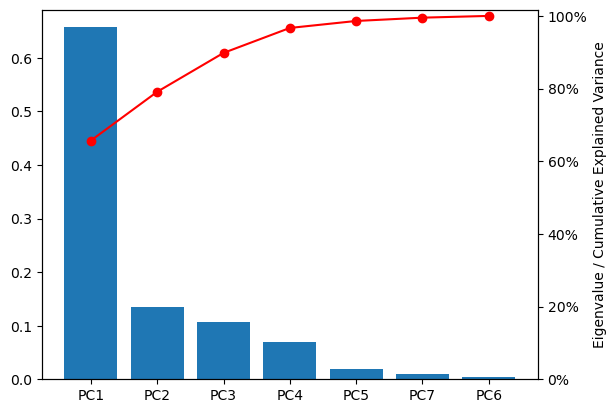

In [18]:
pca, eig_val = PCA(df, True)

the loading matrix :  [[ 1.79007218e-03 -1.34739098e-02 -7.30937432e-03  2.79960375e-03
  -1.57472509e-02 -9.60464466e-01  2.77513997e-01]
 [ 1.14258888e-01 -9.45638549e-01 -3.03637396e-01 -1.08702782e-02
   1.14145847e-02  1.62279190e-02  2.27426638e-03]
 [ 3.86121627e-02 -2.98721229e-01  9.49024361e-01 -4.10474622e-02
   8.27066868e-02 -6.63836302e-03 -7.62440603e-03]
 [ 9.92696770e-01  1.20568173e-01 -2.09926885e-03  1.57351073e-03
  -3.07968356e-03  2.54471889e-04  8.53683885e-05]
 [-1.35829397e-03  3.46412030e-02 -7.34190599e-02  5.33402238e-02
   9.95090277e-01 -1.18211189e-02  1.47717832e-02]
 [-5.47086605e-04  3.19036483e-03  1.15356981e-02 -8.45207810e-04
  -1.01773375e-02  2.77576623e-01  9.60574503e-01]
 [-1.33502974e-03  2.45955347e-02 -3.96967110e-02 -9.97667648e-01
   4.96347945e-02 -3.46566776e-03  1.04378379e-03]]
the eigenvalue value :  [7.25881118e+05 1.50291384e+03 2.65526044e+02 1.10608695e+01
 3.00961022e+00 3.82772089e-01 2.63217297e-01]
the score matrix :  [[3518

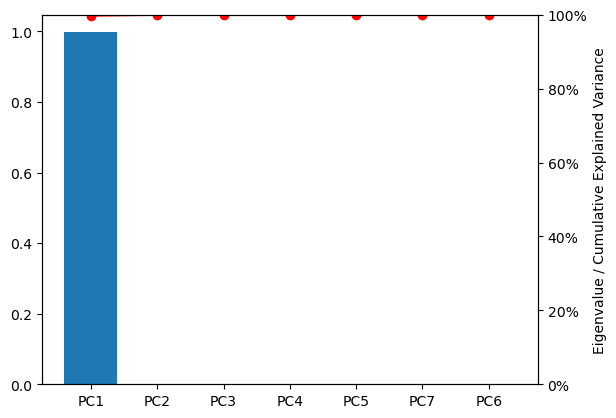

In [19]:
# b.
pca, eig_val = PCA(df, False)

b. the result of comparing isCorrMX is True or False shows that PCA is not scale-invariant.We should rescale if we uses the covariance matrix

Question 4.

In [2]:
arr = pd.DataFrame(arr)

In [20]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
def PCA_for_Q4(X, isCorrMX):
    X = np.transpose(X)
    n_samples, n_features = X.shape
    mean = np.array([np.mean(X.iloc[:, i]) for i in range(n_features)])
    norm_X = X - mean
    corr_matrix = X.corr()
    eig_val, eig_vec = np.linalg.eig(corr_matrix)
    idx = eig_val.argsort()[::-1]
    eig_val = eig_val[idx]
    eig_vec =  eig_vec[idx]
    loading_matrix = eig_vec
    score_matrix = np.dot(X, loading_matrix)
    idx = ['PC' + str(i + 1) for i in idx]
    sum_eig = 0
    explain_var = eig_val / np.sum(eig_val)
    cum_explain_var = np.cumsum(explain_var)
    
#     print('the loading matrix : ', loading_matrix)
#     print('the eigenvalue value : ', eig_val)
#     print('the score matrix : ', score_matrix)
    
    time = 0
    while time < 5:
        count = 0
        for i in range(len(cum_explain_var)):
            if cum_explain_var[i] > 0.5 + (time / 10):
                print('when explaining ', (0.5 + (time / 10)) * 100, 'percents we need ', i, ' principal components')
                break
        time += 1
    score_matrix = score_matrix.astype(float)
    img = score_matrix[:, 0]
    img *= 255.0 / img.max()
    img = img.reshape(56, 46)
    plt.gray()
    plt.imshow(img)
    
    return data, eig_val

when explaining  50.0 percents we need  1  principal components
when explaining  60.0 percents we need  3  principal components
when explaining  70.0 percents we need  6  principal components
when explaining  80.0 percents we need  16  principal components
when explaining  90.0 percents we need  49  principal components


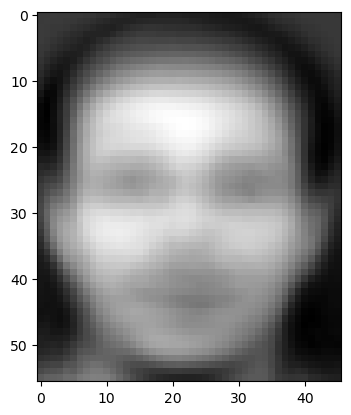

In [21]:
pca, eig_val = PCA_for_Q4(arr, True)